# Oral Cancer Survival Prediction

### A collaborative project exploring oral cancer survival data through statistical analysis, visualization, and interpolation-based modeling.

# Background
#### Oral Cancer: A type of cancer that affects your mouth and throat
   - According to the American Cancer Society, in 2025 there have been approximately 60,000 new cases with around 13,000 deaths from oral cancer.

#### What is the greatest predictor of oral cancer survival rates?
   - Correlation between multiple factors (health, economic status, age) and oral cancer survival rate. 
   - Allow researchers to understand trends in oral cancer and predict outcomes based on patient details.

#### Questions we would like to answered
- Do people who smoke or consume alcohol have a higher chance of survival?
- What’s the variance of survival rates between men and women?
- Does age have an impact?
- Does socioeconomic status impact diagnosis?

# Data
- Expected to update annually 
- Includes the top 30 most populated countries 
- Filtered exclusively for U.S. patients 

In [8]:
full = pd.read_excel('original_oral_cancer_prediction_dataset.xlsx',sheet_name="oral_cancer_prediction_dataset")

In [3]:
full.head()

,ID,Country,Gender,Age,Tobacco_Use,Alcohol_Use,Socioeconomic_Status,Diagnosis_Stage,Treatment_Type,Survival_Rate,HPV_Related
0,1,Ethiopia,Male,34,1,1,High,Early,Radiotherapy,0.826235,0
1,2,Turkey,Female,84,1,1,High,Moderate,Radiotherapy,0.376607,0
2,3,Turkey,Female,62,1,1,Middle,Early,Radiotherapy,0.736296,1
3,4,Tanzania,Male,48,1,1,Middle,Moderate,Combination,0.786118,0
4,5,France,Male,26,1,1,Middle,Early,Radiotherapy,0.830411,0


In [4]:
full.shape

(160292, 11)

In [23]:
# -- Import statements
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
import ipywidgets as widgets 
from ipywidgets import interactive, interact
import scipy
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator as interp2d
import pandas as pd
from IPython.display import Image

mf = Image(filename='Gender Graph.png')
hta = Image(filename='Health Graph.png')
econ = Image(filename='Econ Graph.png')

## Importing Data

In [3]:
# -- Read in oral cancer dataset: https://www.kaggle.com/datasets/ankushpanday1/oral-cancer-prediction-dataset-top-30-countries

### numPy standard read-in
fullData = pd.read_excel("oral_cancer_prediction_dataset.xlsx", sheet_name="oral_cancer_prediction_dataset")

## --- Male and female split data read-in, using PANDAS
male = pd.read_excel('oral_cancer_prediction_dataset.xlsx',sheet_name="Male")
male = male.to_numpy()

female = pd.read_excel('oral_cancer_prediction_dataset.xlsx',sheet_name="Female")
female = female.to_numpy()

## --- Tobacco and/or alcohol use data read-in, using PANDAS
noTnoA = pd.read_excel('oral_cancer_prediction_dataset.xlsx', sheet_name="noTnoA")
noTnoA = noTnoA.to_numpy()

noTyesA = pd.read_excel('oral_cancer_prediction_dataset.xlsx', sheet_name="noTyesA")
noTyesA = noTyesA.to_numpy()

yesTnoA = pd.read_excel('oral_cancer_prediction_dataset.xlsx', sheet_name="yesTnoA")
yesTnoA = yesTnoA.to_numpy()

yesTyesA = pd.read_excel('oral_cancer_prediction_dataset.xlsx', sheet_name="yesTyesA")
yesTyesA = yesTyesA.to_numpy()


In [4]:
# -- WIDGETS -- #

### Male or female - binary radio-button
mfButtons = widgets.RadioButtons(
    options=['Male','Female'],
    value='Male',
    description='Gender',
    disabled=False
)

### Tobacco and alcohol use - individual checkbox widgets, boolean
tobaccoWidget = widgets.Checkbox(
    value=False,
    description='Tobacco',
    disabled=False,
    indent=False
)

alcoholWidget = widgets.Checkbox(
    value=False,
    description='Alcohol',
    disabled=False,
    indent=False
)

## Economic status
econdiag = widgets.Dropdown(
    options=['Low', 'Middle', 'High'],
    value='Low',
    description='Economic Status',
    disabled=False,
)

In [8]:
# -- Indices --

### [:,3] retrieves column "Age"
### [:,9] retrieves column "Survival Rate"
### [:,4] retrieves column "Tobacco Use"
### [:,5] retrieves column "Alcohol Use

###fullData[:,4][4], for example, retrieves the 3rd item from the column "Tobacco Use".
###fullData[:,4]

## Age vs. Survival Rate, based on Gender

In [18]:
# -- FUNCTIONS for plotting age vs. survival rate, based on gender
def getGenderSheets(gender):
    fig, ax = plt.subplots(figsize=(15,6))
    
    
    if gender == "Male":
        malePlot = plt.scatter(male[:,3],male[:,9])
        fig.suptitle('Male Plot', fontsize = 20)
    elif gender == "Female":
        femalePlot = plt.scatter(female[:,3],female[:,9])
        fig.suptitle('Female Plot', fontsize = 20)
    '''
    Linear regression for age vs. survival rate. Polynomial objects stored in pfitX 
    notable for possible interpolation?
    '''
    x1, y1 = male[:,3].astype(float), male[:,9].astype(float)
    pfit1 = Polynomial.fit(x1, y1, deg = 1)
    malexfit1, maleyfit1 = pfit1.linspace(n = 1001, domain=[x1.min(),x1.max()])
    ax.plot(malexfit1, maleyfit1, color='green', label='Male Survival Rate Trend')

    x2, y2 = female[:,3].astype(float), female[:,9].astype(float)
    pfit2 = Polynomial.fit(x2, y2, deg = 1)
    femalexfit1, femaleyfit1 = pfit2.linspace(n = 1001, domain=[x2.min(),x2.max()])
    ax.plot(femalexfit1, femaleyfit1, color='pink', label='Female Survival Rate Trend')

    ax.legend()

    print("Correlation coefficient for male survival rate:", np.corrcoef(x1,y1))
    print("Correlation coefficient for female survival rate:", np.corrcoef(x2,y2))

genderSurv = interact(getGenderSheets, gender=mfButtons)

interactive(children=(RadioButtons(description='Gender', options=('Male', 'Female'), value='Male'), Output()),…

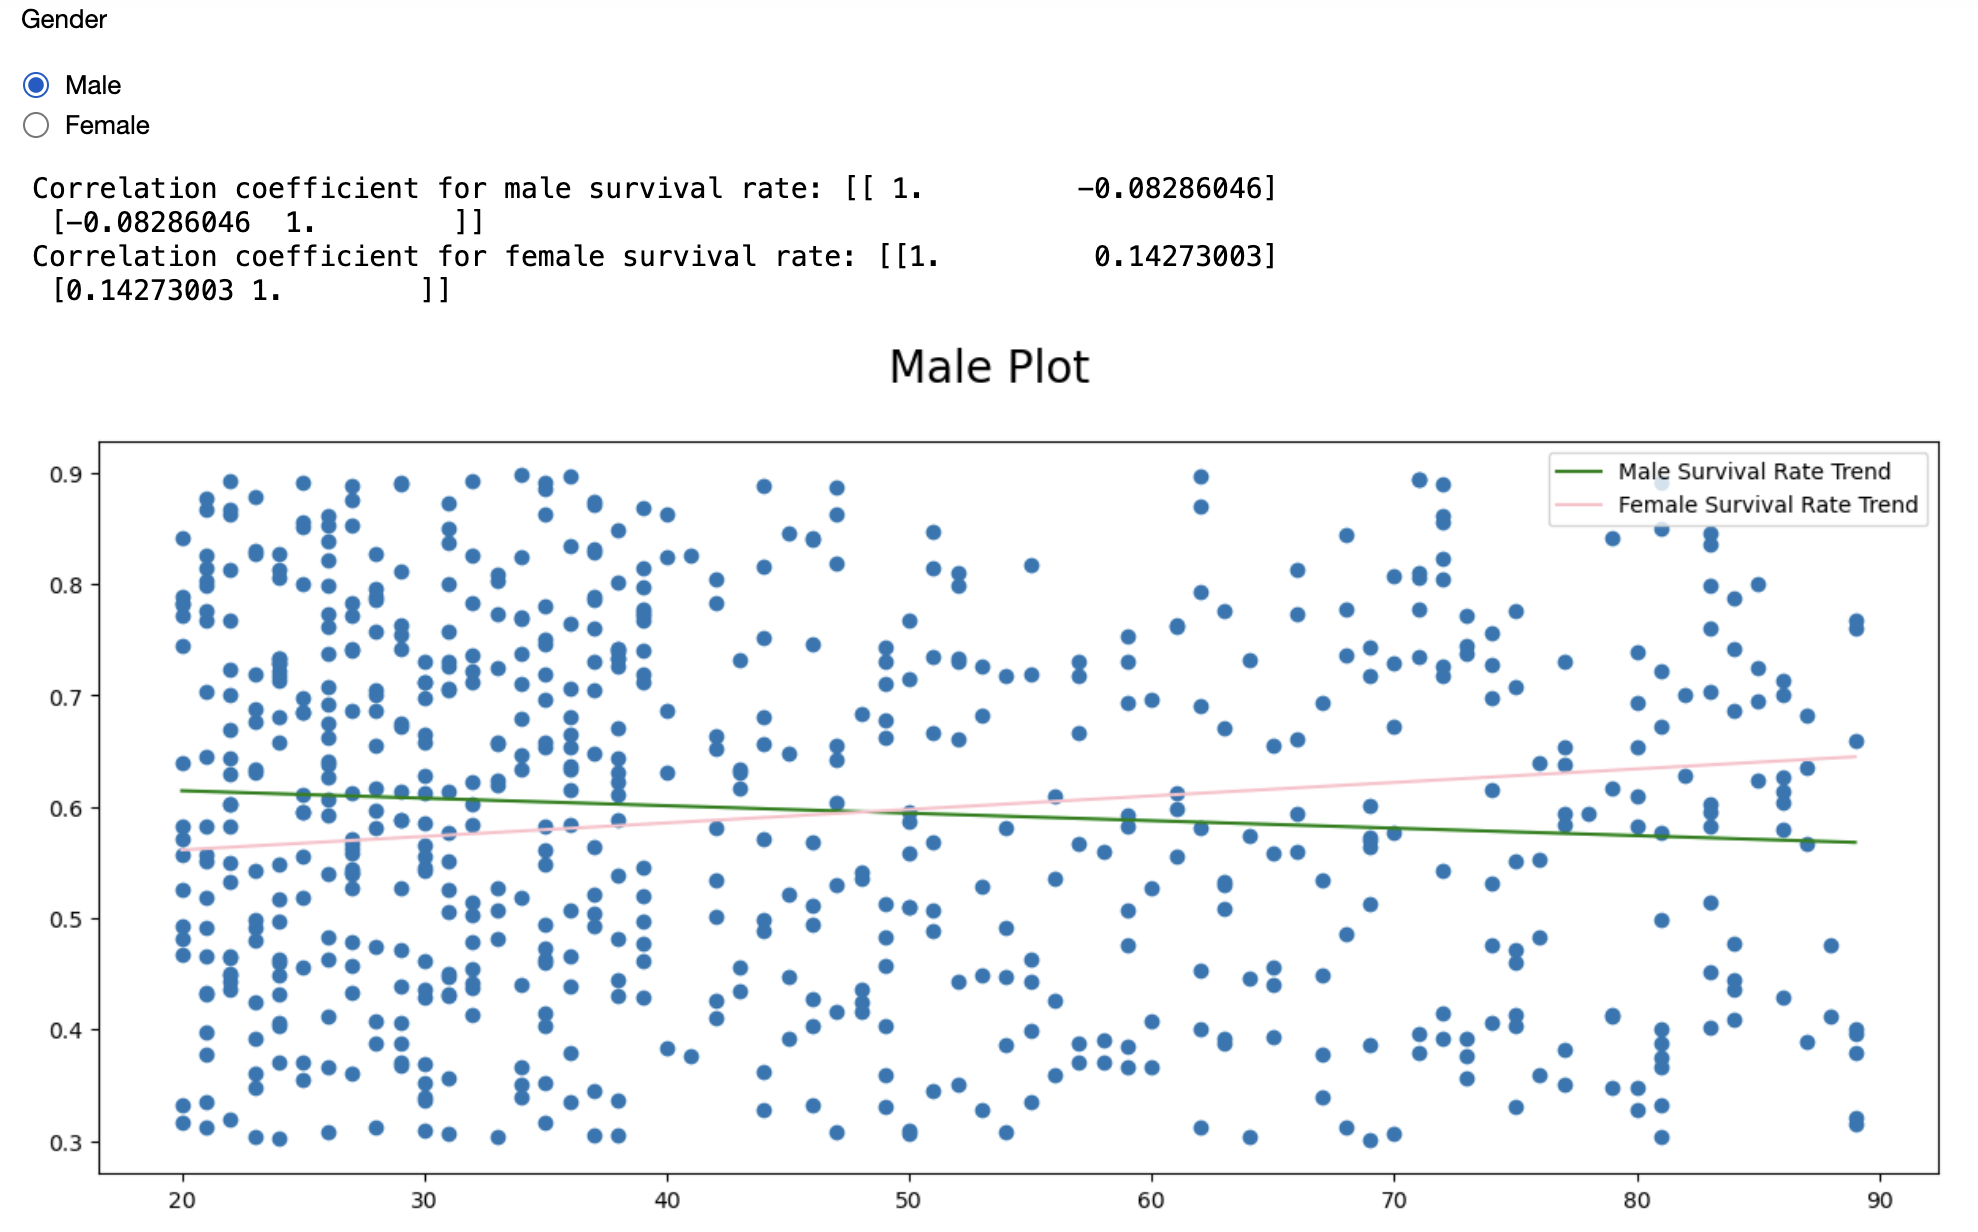

In [21]:
mf

- Survival Rate bounded to 55% and 65% across all ages regardless of gender or age. 
- Men and women experience similar survival rates at about 48 years old - 60% survival rate. 
- Men experience better survival rates in their 20s but decline over time 
- Women have worse survival rates in their 20s but improve over time 
- Most data points occurred between 20 and 40 years of age
- Male and female survival rate indicate weak relationships between age and survival rate 
    - (r = -0.08 and r = 0.14, respectively)

## Age vs. Survival Rate, based on Health Factors (Tobacco and Alcohol use)

In [17]:
def getHealthFactorSheets(tobacco, alcohol):
    fig, ax = plt.subplots(figsize=(15,6))
    if tobacco:
        if alcohol:
            tobaccoAndAlcohol = plt.scatter(yesTyesA[:,3],yesTyesA[:,9])
            fig.suptitle('Tobacco and Alcohol', fontsize = 20)
        else:
            tobaccoNoAlcohol = plt.scatter(yesTnoA[:,3],yesTnoA[:,9])
            fig.suptitle('Tobacco, No Alcohol', fontsize = 20)
    elif tobacco == False:
        if alcohol:
            noTobaccoYesAlcohol = plt.scatter(noTyesA[:,3],noTyesA[:,9])
            fig.suptitle('Alcohol, No Tobacco', fontsize = 20)
        else:
            noTobaccoNoAlcohol = plt.scatter(noTnoA[:,3],noTnoA[:,9])
            fig.suptitle('No Alcohol or Tobacco', fontsize = 20)
    x3, y3 = yesTyesA[:,3].astype(float), yesTyesA[:,9].astype(float)
    pfit3 = Polynomial.fit(x3, y3, deg = 1)
    ytyaxfit1, ytyayfit1 = pfit3.linspace(n = 1001, domain=[x3.min(),x3.max()])
    ax.plot(ytyaxfit1, ytyayfit1, color='red', label='Tobacco and Alcohol Survival Rate')

    x4, y4 = yesTnoA[:,3].astype(float), yesTnoA[:,9].astype(float)
    pfit4 = Polynomial.fit(x4, y4, deg = 1)
    ytnaxfit1, ytnayfit1 = pfit4.linspace(n = 1001, domain=[x4.min(),x4.max()])
    ax.plot(ytnaxfit1, ytnayfit1, color='green', label='Tobacco, no Alcohol')

    x5, y5 = noTyesA[:,3].astype(float), noTyesA[:,9].astype(float)
    pfit5 = Polynomial.fit(x5, y5, deg = 1)
    ntyaxfit1, ntyayfit1 = pfit5.linspace(n = 1001, domain=[x5.min(),x5.max()])
    ax.plot(ntyaxfit1, ntyayfit1, color='purple', label='Alcohol, no Tobacco')

    x6, y6 = noTnoA[:,3].astype(float), noTnoA[:,9].astype(float)
    pfit6 = Polynomial.fit(x6, y6, deg = 1)
    ntnaxfit1, ntnayfit1 = pfit6.linspace(n = 1001, domain=[x6.min(),x6.max()])
    ax.plot(ntnaxfit1, ntnayfit1, color='black', label='No Alcohol or Tobacco')

    ax.legend()

HFSurv = interact(getHealthFactorSheets, tobacco=tobaccoWidget, alcohol=alcoholWidget)

interactive(children=(Checkbox(value=False, description='Tobacco', indent=False), Checkbox(value=False, descri…

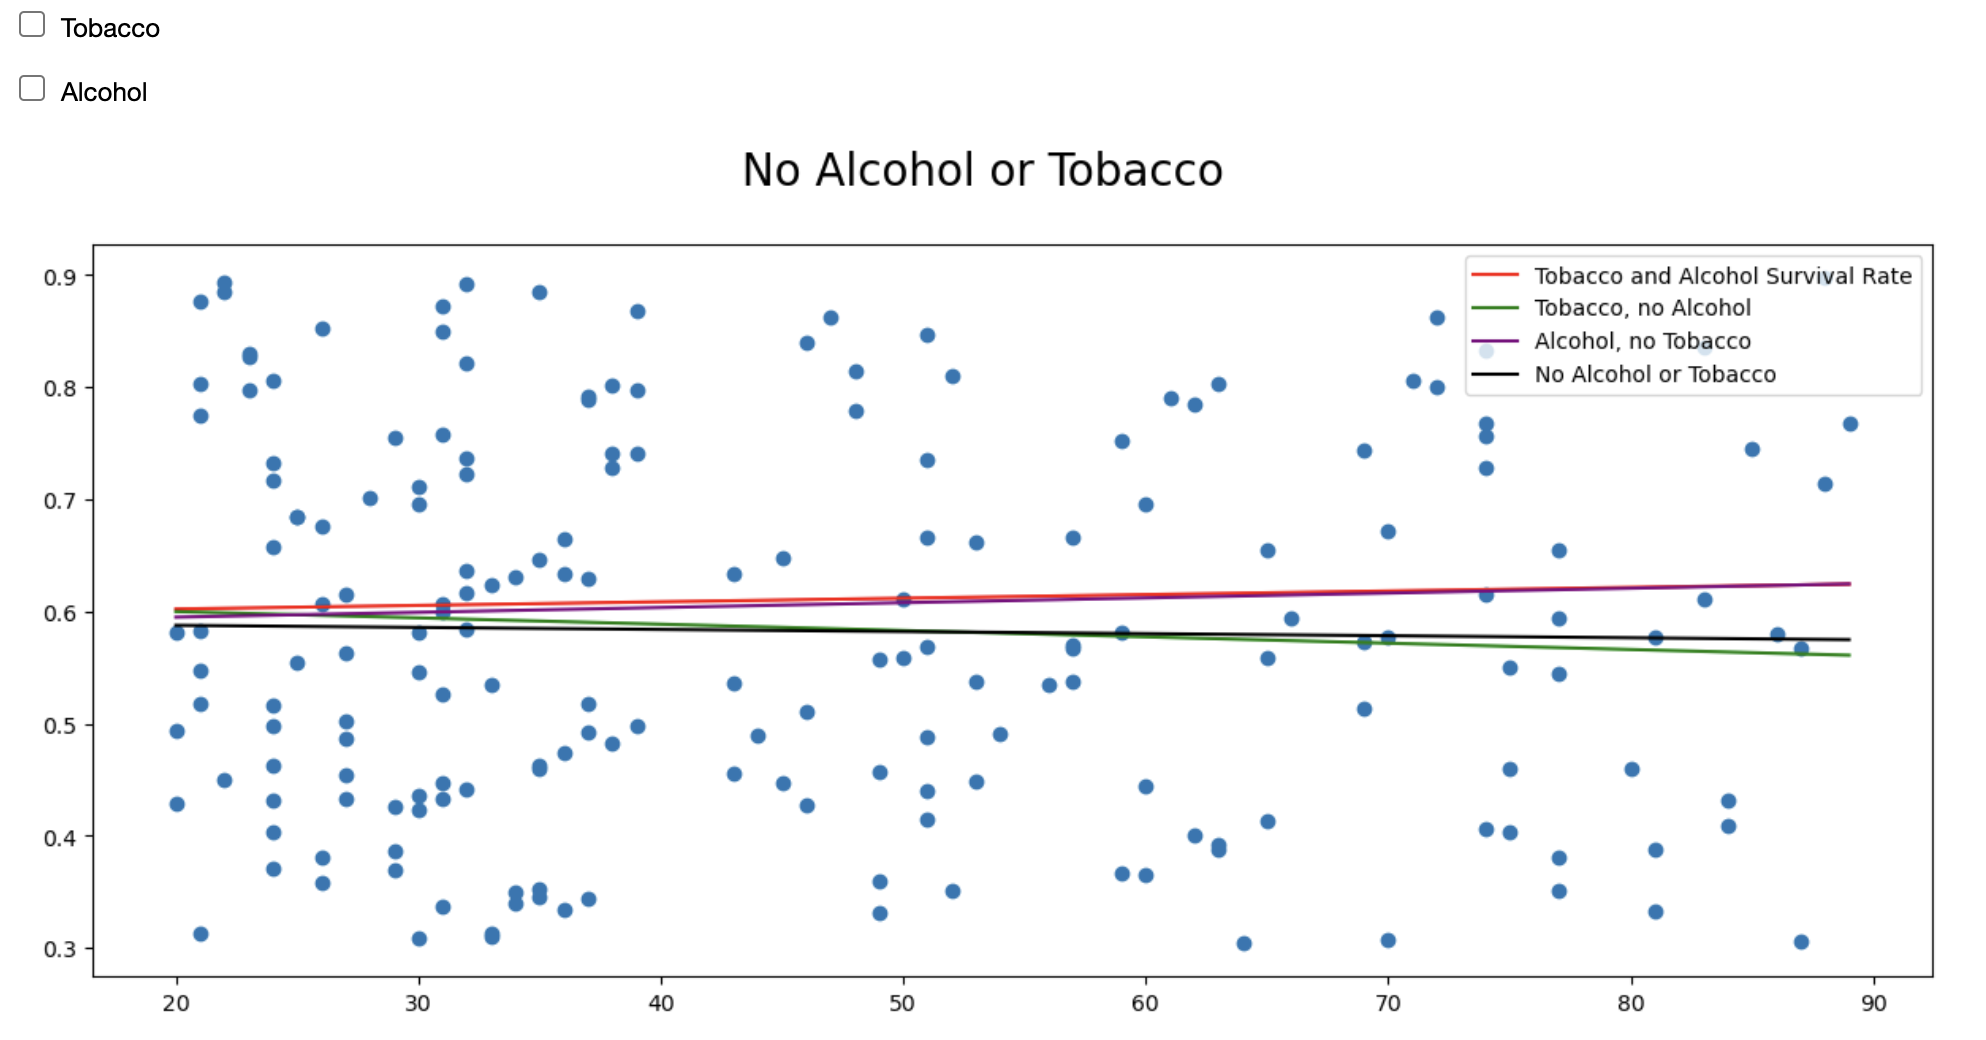

In [24]:
hta

- Survival Rate bounded to 55% and 65% across all ages regardless of indicated health factors 
- Trends for most permutations for indicated health factors indicate slight positive correlation

## Diagnosis Stage vs Survival Rate, based on Economic Status

In [16]:
fulldf = pd.DataFrame(full) #takes original, 160000 observations as a PANDAS dataframe

#to use the 1000 US-only dataframe, refer to fullData['xxxx']

#create first-order sub-dataframes based on socioeconomic status
lowdf = fullData[fullData['Socioeconomic_Status'] == 'Low']
middf = fullData[fullData['Socioeconomic_Status'] == 'Middle']
highdf = fullData[fullData['Socioeconomic_Status'] == 'High']

#create second-order sub-dataframes, based on diagnosis stages within a given socioeconomic status
## stored as an arraylike, to be iterated through for rounding
low = [lowdf[lowdf['Diagnosis_Stage'] == 'Early'].to_numpy(), lowdf[lowdf['Diagnosis_Stage'] == 'Moderate'].to_numpy(),lowdf[lowdf['Diagnosis_Stage'] == 'Late'].to_numpy()]
mid = [middf[middf['Diagnosis_Stage'] == 'Early'].to_numpy(), middf[middf['Diagnosis_Stage'] == 'Moderate'].to_numpy(),middf[middf['Diagnosis_Stage'] == 'Late'].to_numpy()]
high = [highdf[highdf['Diagnosis_Stage'] == 'Early'].to_numpy(), highdf[highdf['Diagnosis_Stage'] == 'Moderate'].to_numpy(),highdf[highdf['Diagnosis_Stage'] == 'Late'].to_numpy()]

#initialize lists and append early, moderate, and late survival-rate means to each list -- these serve as y values
lowRounded, midRounded, highRounded = [], [], []

for i in low:
    lowRounded.append(i[:,9].mean())

for i in mid:
    midRounded.append(i[:,9].mean())

for i in high:
    highRounded.append(i[:,9].mean())


def econdiagStatus(econstat):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_ylim(0.55,0.65)
    ax.set_xlabel('Diagnosis Stage', fontsize = 15)
    ax.set_ylabel('Mean Survival Rate', fontsize = 15)
    if econstat == "Low":   
        lowbar = plt.bar(["Early","Moderate","Late"],lowRounded)   
        fig.suptitle('Low Socioeconomic Status', fontsize = 20)
    elif econstat == "Middle":
        plt.bar(["Early","Moderate","Late"],midRounded)
        fig.suptitle('Middle Socioeconomic Status', fontsize = 20)
    elif econstat == "High":
        plt.bar(["Early","Moderate","Late"],highRounded)
        fig.suptitle('High Socioeconomic Status', fontsize = 20)
        
econdiagDrop = interact(econdiagStatus, econstat = econdiag)

interactive(children=(Dropdown(description='Economic Status', options=('Low', 'Middle', 'High'), value='Low'),…

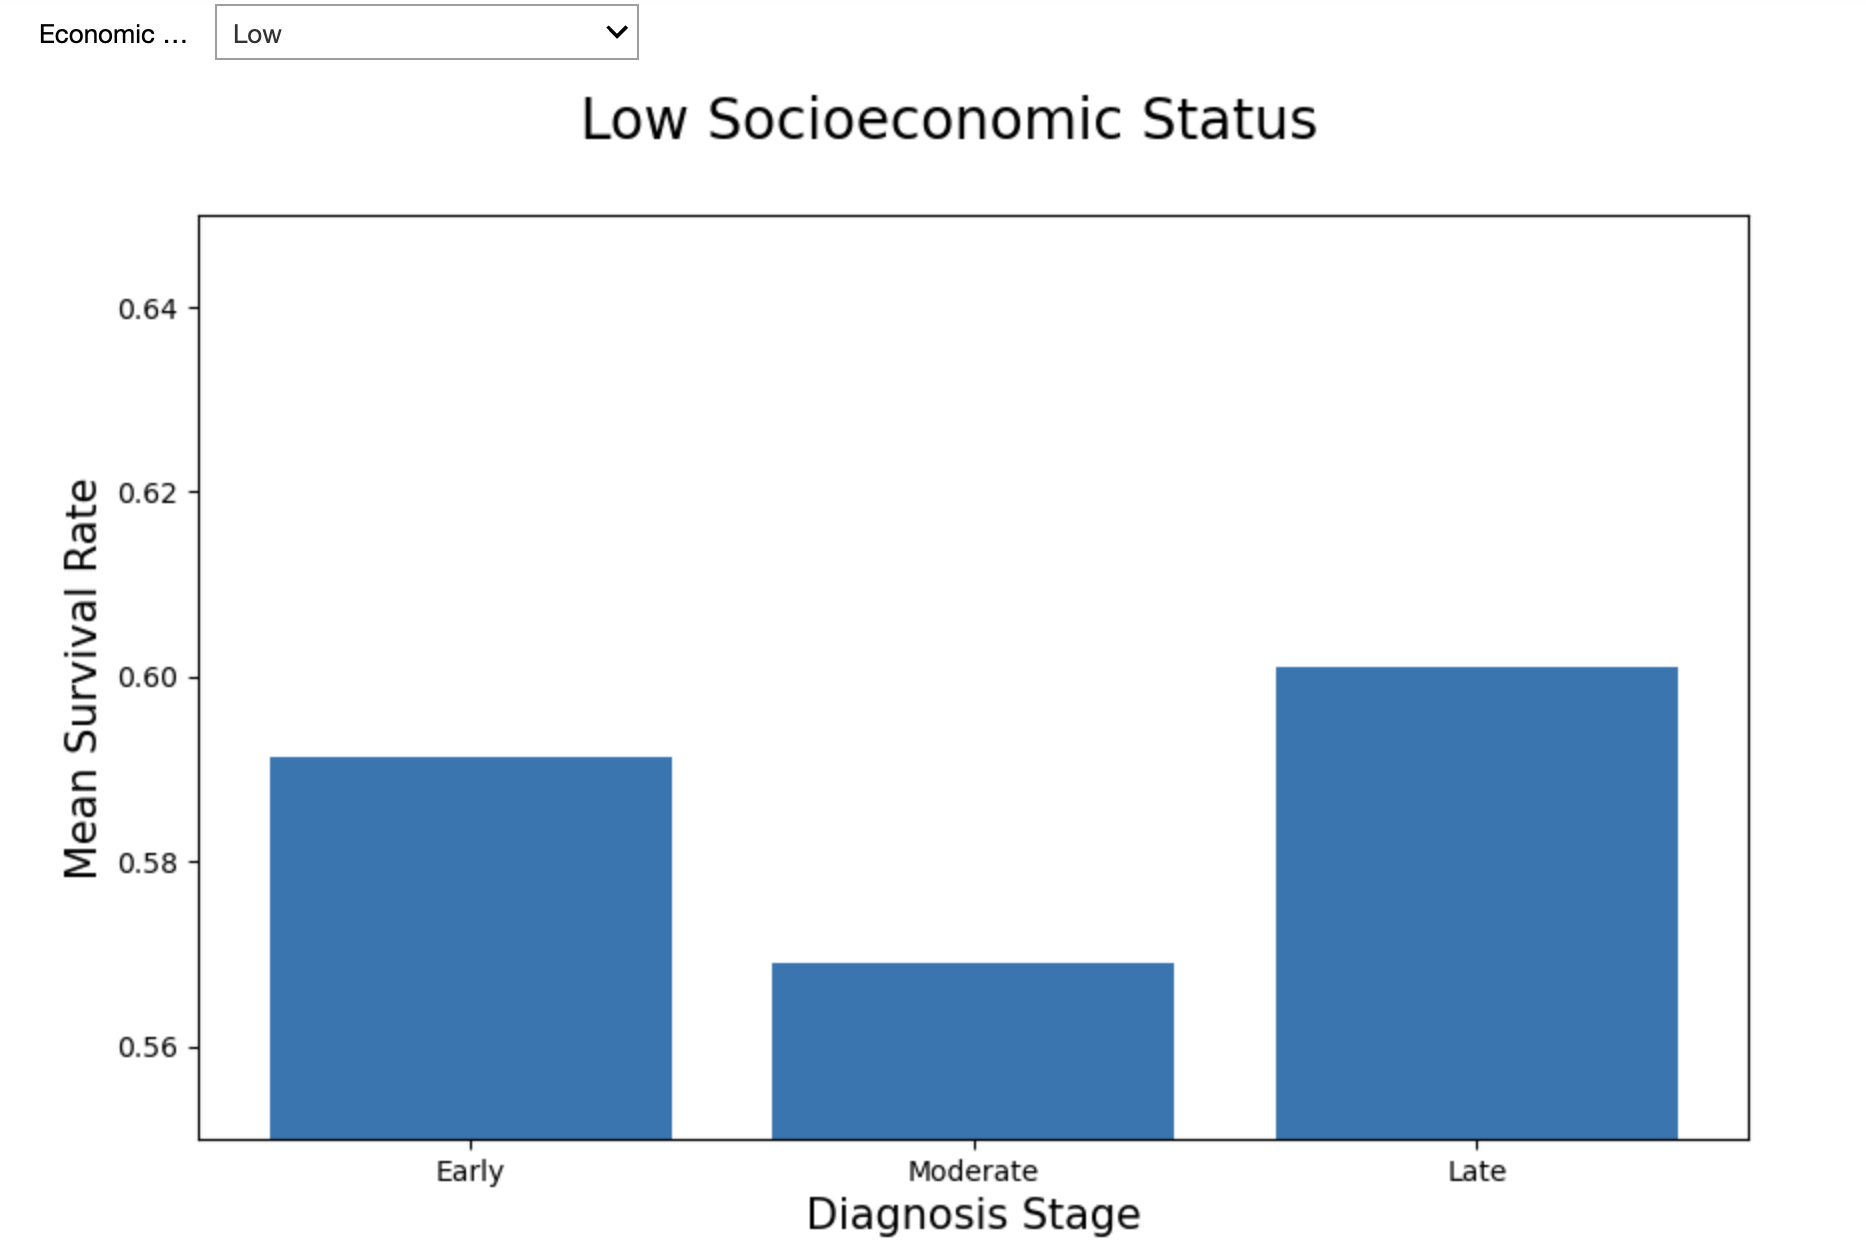

In [25]:
econ

- Early diagnosis is similar across all groups
- Moderate is highest under high economic status and lowest among low economic status
    - Access to better treatment plans
- Late is surprisingly highest under middle economic status
    - Suggests different variables might be impacting results

## Conclusions
- Health Factors: Tobacco use (no alcohol) has a negative impact on survival rate
- Gender: Does not significantly impact survival rates, but there are gender-based differences between men and women
- Socioeconomic Status: Economic status impacts access to diagnosis and treatment

## Sources
- https://www.cancer.org/cancer/types/oral-cavity-and-oropharyngeal-cancer/about/key-statistics.html
- https://www.kaggle.com/datasets/ankushpanday1/oral-cancer-prediction-dataset-top-tre-countries